<a href="https://colab.research.google.com/github/Hyolinkim/capstoneDesign_20210830/blob/main/LSTM_Test_ver_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
filename='/content/drive/MyDrive/캡스톤디자인2/Sendsordata/Dumbbellcurl_rw_24_genNorm_ver1.csv'

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import csv

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [62]:
## Data Load
f = open(filename, 'r', encoding='utf-8')
rdr = csv.reader(f)

source =[]
for index,val in enumerate(rdr):
    if index > 0:
        source.append(val)

source = np.array(source)
print('Source Shape is',source.shape)

x_data = source[:,:6]
x_data=np.asfarray(x_data,float)
y_data_str = source[:,6]
y_data = []

Source Shape is (1058, 8)


In [63]:

for i in range(len(y_data_str)):
    temp = y_data_str[i]
    ## 'y' Label : 1, 'n' Label : 0, 
    if temp == 'y':
        tmp = 1
    else:
        tmp = 0

    y_data.append(tmp)
y_data = np.array(y_data)
print('x_data Shape is',x_data.shape)
print('y_data Shape is',y_data.shape)

## 데이터 Split / LSTM에 입력하기 위한 Data Shape 조정
x_train,x_test,y_train,y_test = train_test_split(x_data, y_data, test_size =0.3, shuffle=True)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

print('x_train Shape is',x_train.shape, '// x_test Shape is',x_test.shape)
print('y_train Shape is',y_train.shape, '// y_test Shape is',y_test.shape,'\n')

## 모델 구성
model = Sequential()
model.add(LSTM(10, activation = 'relu', input_shape=(6,1)))
model.add(Dropout(0.5)) # 드롭아웃 추가. 비율은 50%
model.add(Dense(5))
model.add(Dropout(0.5)) # 드롭아웃 추가. 비율은 50%
model.add(Dense(1))
model.summary()

x_data Shape is (1058, 6)
y_data Shape is (1058,)
x_train Shape is (740, 6, 1) // x_test Shape is (318, 6, 1)
y_train Shape is (740,) // y_test Shape is (318,) 

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 10)                480       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 5)                 55        
_________________________________________________________________
dropout_1 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 6         
Total params: 541
Trainable params: 541
Non-trainable params: 0
__________________________

In [64]:
## 모델 학습
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=10, batch_size=1)

Epoch 1/10
740/740 [==============================] - 3s 3ms/step - loss: 2.2202 - accuracy: 0.8405
Epoch 2/10
740/740 [==============================] - 2s 3ms/step - loss: 0.1660 - accuracy: 0.9784
Epoch 3/10
740/740 [==============================] - 2s 3ms/step - loss: 0.0641 - accuracy: 0.9946
Epoch 4/10
740/740 [==============================] - 2s 3ms/step - loss: 0.0647 - accuracy: 0.9946
Epoch 5/10
740/740 [==============================] - 2s 3ms/step - loss: 0.0437 - accuracy: 0.9959
Epoch 6/10
740/740 [==============================] - 2s 3ms/step - loss: 0.0231 - accuracy: 0.9973
Epoch 7/10
740/740 [==============================] - 2s 3ms/step - loss: 0.0228 - accuracy: 0.9973
Epoch 8/10
740/740 [==============================] - 2s 3ms/step - loss: 0.0206 - accuracy: 0.9986
Epoch 9/10
740/740 [==============================] - 2s 3ms/step - loss: 0.0412 - accuracy: 0.9973
Epoch 10/10
740/740 [==============================] - 2s 3ms/step - loss: 0.0000e+00 - accuracy: 1.

318/318 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000


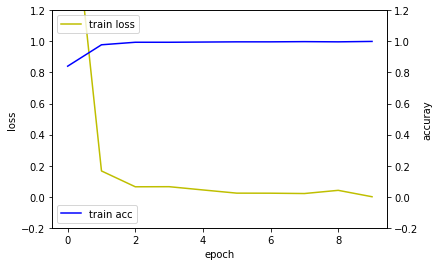

## evaluation loss and_metrics ##
[0.0, 1.0]


In [65]:
## 모델 테스트
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=1)
tmpsum = loss_and_metrics[0]+loss_and_metrics[1]
prediction = [loss_and_metrics[0]/tmpsum,loss_and_metrics[1]/tmpsum]

## 가시화
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.set_ylim([-0.2, 1.2])
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.set_ylim([-0.2, 1.2])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

print('## evaluation loss and_metrics ##')
print(prediction)